In [29]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [30]:
conn = sqlite3.connect("../db.sqlite3")

query = """
SELECT 
    restaurant_product.name,
    restaurant_product.price,
    restaurant_orderitem.quantity,
    restaurant_order.datetime
FROM 
    restaurant_orderitem
JOIN 
    restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
"""

df = pd.read_sql_query(query, conn)

conn.close()

df.to_csv("output_data.csv", encoding="utf-8")

In [31]:
df.shape

(74818, 4)

In [32]:
df.head()

,name,price,quantity,datetime
0,Plain Papadum,0.80,2,2019-08-03 20:25:00
1,King Prawn Balti,12.95,1,2019-08-03 20:25:00
2,Garlic Naan,2.95,1,2019-08-03 20:25:00
3,Mushroom Rice,3.95,1,2019-08-03 20:25:00
4,Paneer Tikka Masala,8.95,1,2019-08-03 20:25:00


In [33]:
df.dtypes

name         object
price       float64
quantity      int64
datetime     object
dtype: object

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [61]:
product_quantity_sold = df.groupby("name")["quantity"].sum().reset_index()
top_10_products_sold = product_quantity_sold.sort_values(by="quantity", ascending=False)[:10].reset_index()
top_10_products_sold = top_10_products_sold.drop(columns="index")
top_10_products_sold.index = range(1, 11)
top_10_products_sold

,name,quantity
1,Plain Papadum,10648
2,Pilau Rice,6367
3,Plain Naan,4983
4,Garlic Naan,3318
5,Plain Rice,2964
6,Onion Bhajee,2749
7,Mango Chutney,2504
8,Chicken Tikka Masala,2473
9,Chapati,1935
10,Mint Sauce,1840


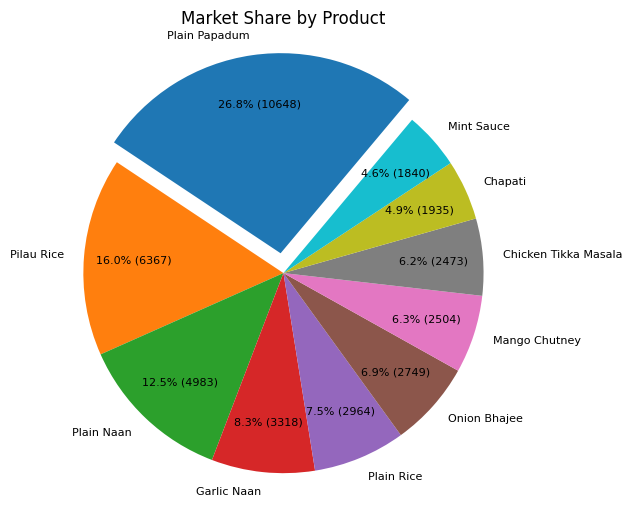

In [103]:
labels = top_10_products_sold["name"]
values = top_10_products_sold["quantity"]


def func(pct, allvalues):
    absolute = int(round(pct/100. * sum(allvalues)))
    return "{:.1f}% ({:d})".format(pct, absolute)

plt.figure(figsize=(6, 6))
plt.pie(
    values, 
    labels=labels, 
    autopct=lambda pct: func(pct, values), 
    startangle=50, 
    explode=[0.1] + [0] * 9,
    pctdistance=0.75,
    textprops={"fontsize": 8}
)

plt.title("Market Share by Product")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [84]:
df["Item Price"] = df["price"] * df["quantity"]

product_total_value = df.groupby("name")["Item Price"].sum().reset_index()
top_10_products_value = product_total_value.sort_values(by="Item Price", ascending=False)[:10].reset_index()
top_10_products_value = top_10_products_value.drop(columns="index")
top_10_products_value.index = range(1, 11)
top_10_products_value

,name,Item Price
1,Chicken Tikka Masala,22133.35
2,Pilau Rice,18782.65
3,Plain Naan,12955.80
4,Korma,12261.50
5,Bombay Aloo,10894.45
6,Onion Bhajee,10858.55
7,Butter Chicken,10626.60
8,Garlic Naan,9788.10
9,Korma - Chicken,9764.45
10,Plain Rice,8743.80


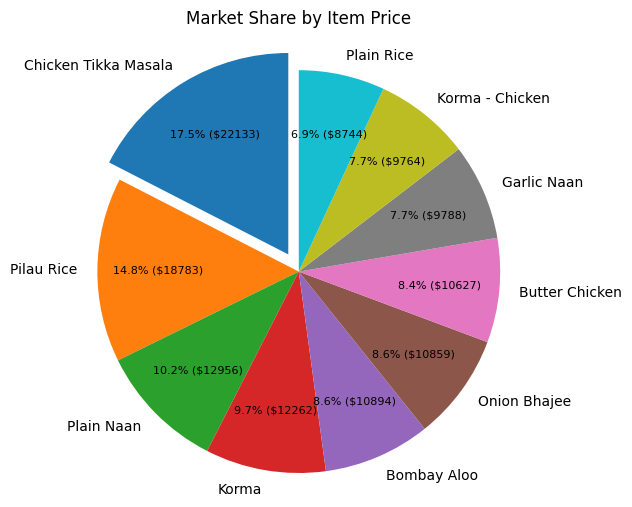

In [102]:
labels = top_10_products_value["name"]
values = top_10_products_value["Item Price"]


def func(pct, allvalues, fontsize):
    absolute = int(round(pct/100. * sum(allvalues)))
    return "{:.1f}% (${:.0f})".format(pct, absolute), fontsize

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    values, 
    labels=labels, 
    autopct=lambda pct: func(pct, values, 12)[0],
    startangle=90, 
    explode=[0.1] + [0] * 9,
    pctdistance=0.7
)

for autotext in autotexts:
    autotext.set_fontsize(8)

plt.title("Market Share by Item Price")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [88]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["Order Hour"] = df["datetime"].dt.hour
df["Item Price"] = df["price"] * df["quantity"]
df

,name,price,quantity,datetime,Item Price,Order Hour
0,Plain Papadum,0.80,2,2019-08-03 20:25:00,1.60,20
1,King Prawn Balti,12.95,1,2019-08-03 20:25:00,12.95,20
2,Garlic Naan,2.95,1,2019-08-03 20:25:00,2.95,20
3,Mushroom Rice,3.95,1,2019-08-03 20:25:00,3.95,20
4,Paneer Tikka Masala,8.95,1,2019-08-03 20:25:00,8.95,20
...,...,...,...,...,...,...
74813,House Red wine 75cl,17.95,2,2016-05-18 18:53:00,35.90,18
74814,House Red wine 75cl,17.95,2,2016-05-14 19:28:00,35.90,19
74815,House Red wine 75cl,17.95,2,2016-05-10 13:18:00,35.90,13
74816,House white wine 75cl,17.95,1,2016-04-07 19:04:00,17.95,19


In [89]:
hourly_income = df.groupby("Order Hour")["Item Price"].sum().reset_index()
hourly_income

,Order Hour,Item Price
0,0,177.95
1,1,54.65
2,2,199.25
3,3,8.90
4,4,63.45
5,5,57.40
6,6,121.60
7,8,447.70
8,9,570.60
9,10,1250.35


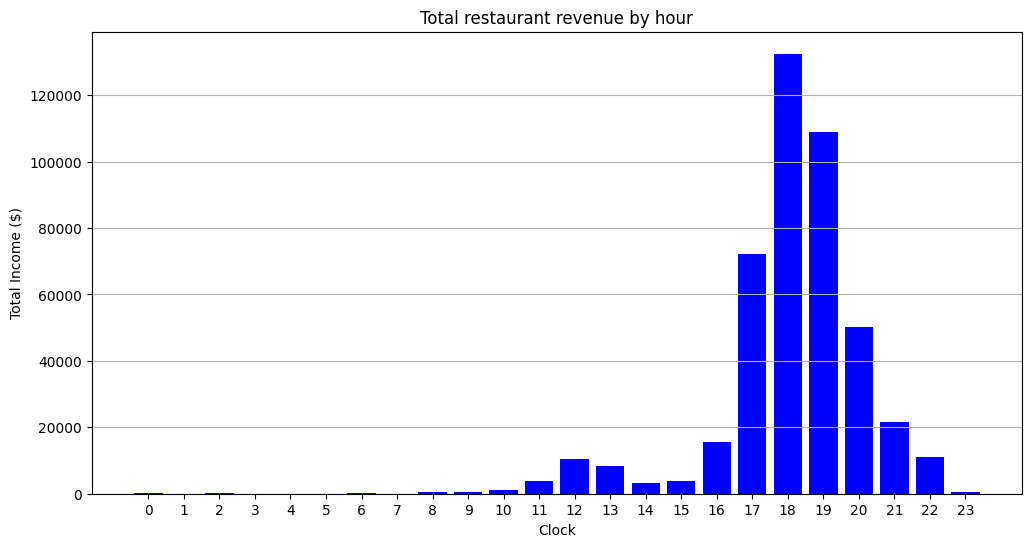

In [90]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_income["Order Hour"], hourly_income["Item Price"], color="blue")
plt.xlabel("Order hour")
plt.ylabel("Total Income ($)")
plt.title("Total restaurant revenue by hour")
plt.xticks(range(0, 24))
plt.grid(axis="y")

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [92]:
df["Order Day Of The Week"] = df["datetime"].dt.day_name()
df["Item Price"] = df["price"] * df["quantity"]
df.head()

,name,price,quantity,datetime,Item Price,Order Hour,Order Day Of The Week
0,Plain Papadum,0.80,2,2019-08-03 20:25:00,1.60,20,Saturday
1,King Prawn Balti,12.95,1,2019-08-03 20:25:00,12.95,20,Saturday
2,Garlic Naan,2.95,1,2019-08-03 20:25:00,2.95,20,Saturday
3,Mushroom Rice,3.95,1,2019-08-03 20:25:00,3.95,20,Saturday
4,Paneer Tikka Masala,8.95,1,2019-08-03 20:25:00,8.95,20,Saturday


In [94]:
weekly_income = df.groupby("Order Day Of The Week")["Item Price"].sum().reset_index()
weekly_income

,Order Day Of The Week,Item Price
0,Friday,100339.15
1,Monday,40008.30
2,Saturday,112191.65
3,Sunday,67105.95
4,Thursday,46021.55
5,Tuesday,38145.65
6,Wednesday,41246.20


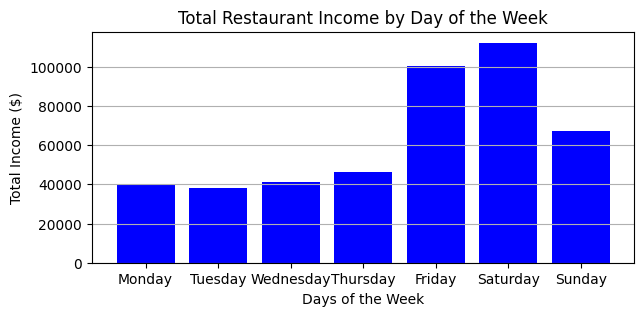

In [99]:
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_income["Order Day Of The Week"] = pd.Categorical(weekly_income["Order Day Of The Week"], categories=ordered_days, ordered=True)
weekly_income = weekly_income.sort_values("Order Day Of The Week")

plt.figure(figsize=(7, 3))
plt.bar(weekly_income["Order Day Of The Week"], weekly_income["Item Price"], color="blue")
plt.xlabel("Days of the Week")
plt.ylabel("Total Income ($)")
plt.title("Total Restaurant Income by Day of the Week")
plt.grid(axis="y")

plt.show()